In [20]:
import pandas as pd

In [41]:
import re

# Collect DATA

### for politics class

In [21]:
politics_dataset = pd.read_csv("reddit_politics.csv")

In [22]:
politics_dataset.head()

,title,score,id,url,comms_num,created,body,timestamp
0,A Right Wing Group in Texas Is Making up Fake ...,166,ov1ll3,https://www.vice.com/en/article/wx5bg5/blm-whi...,34,1.627710e+09,NaN,2021-07-31 08:35:47
1,DOJ sues Texas over Gov. Abbott’s order for la...,85,ouwc9i,https://www.kxan.com/news/texas-politics/doj-s...,17,1.627688e+09,NaN,2021-07-31 02:26:12
2,"From white evangelicals to QAnon believers, wh...",57,ouqkxi,https://www.modbee.com/news/coronavirus/articl...,27,1.627671e+09,NaN,2021-07-30 21:45:09
3,DeSantis says he’ll sign order allowing parent...,269,oun2lc,https://www.orlandosentinel.com/politics/os-ne...,138,1.627660e+09,NaN,2021-07-30 18:43:05
4,"Show on the road: In Utah, Florida Gov. Ron De...",31,ouipnz,https://www.tallahassee.com/story/news/politic...,28,1.627644e+09,NaN,2021-07-30 14:21:54


In [23]:
politics_headline = list(politics_dataset["title"].values)

In [24]:
politics_headline[:10]

['A Right Wing Group in Texas Is Making up Fake Black Lives Matter Campaigns',
 'DOJ sues Texas over Gov. Abbott’s order for law enforcement to pull over vehicles with migrants',
 'From white evangelicals to QAnon believers, who’s most likely to refuse COVID vaccine?',
 'DeSantis says he’ll sign order allowing parents to ignore COVID-19 school mask mandates',
 "Show on the road: In Utah, Florida Gov. Ron DeSantis rails against 'Faucian dystopia'",
 'Michigan Supreme Court limits use of restraints on juveniles',
 "'Election integrity committee' in York County accused of voter intimidation",
 'Texas Senator Used MLK’s Words To Attack Critical Race Theory. MLK III Says His Father’s Work Supports It',
 "Wisconsin GOP leader doesn't want another election probe",
 'Democrats press Biden to extend eviction ban']

In [25]:
len(politics_headline)

28063

### for sports class

In [2]:
import tweepy                   # Python wrapper around Twitter API
import json
import csv
from datetime import date
from datetime import datetime ,timedelta
import time
import pytz

In [3]:
api_key = "xKzBSzByetuK26U0gJJc5gndZ"
api_secret_key = "Fe02roTRDoQAHzqnDbh32nZ0mA2sq3tY3RdOr7AEIq3rXbDleD"
access_token = "1451120762983751682-L1JBPrsf3JubMJalu4EDesoxIOi6xs"
access_token_secret = "ynBdfv0cpxsTvBsP0pyt2RxeSL5PTBYh37zU7NcEEcOGD"



auth = tweepy.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [15]:
def get_latest_tweets(screen_name):
    alltweets = []
    new_tweets = api.user_timeline(screen_name = screen_name,count=200)
    alltweets.extend(new_tweets)
    oldest = alltweets[-1].id - 1
    
    while( (len(new_tweets) > 0) or (len(alltweets)<1000) ):
        new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)
        alltweets.extend(new_tweets)
        oldest = alltweets[-1].id - 1
    tweets = [t.text for t in alltweets] 
    return tweets

In [16]:
accountList=[
    "SportsCenter",
    "NFL",
    "espn",
    "NBA",
]

In [17]:
SportTweets=[]
for account in accountList:
    SportTweets.extend(get_latest_tweets(account))

In [18]:
SportTweets[0:10]

['RT @OTLonESPN: Enshrine or Decline?\n\nIs Barry Bonds a Hall of Famer? https://t.co/MjH1nubftJ',
 "Breaking: Sean Payton has decided to step away as the Saints' coach after 16 years, a source confirmed to… https://t.co/GZqwQuvnJh",
 '"SEND IT IN, JEROME!"\n\n34 years ago today, Jerome Lane shattered the backboard while playing for Pitt 🤯 https://t.co/XycbUnZylF',
 'RT @AdamSchefter: Bears are finalizing a deal to hire Chiefs’ Assistant Director of Player Personnel Ryan Poles as their next general manag…',
 'While @CooperKupp was in college, his wife Anna supported them monetarily by working full-time so he could focus on… https://t.co/uLkzqBNaUf',
 "Two years ago today, @KingJames passed Kobe on the NBA's all-time scoring list 💜💛 https://t.co/XSmcm9Sj3M",
 'A CAREER HIGH FOR THE PLAYER OF THE YEAR CANDIDATE 🔥\n\n🌟 37 PTS\n🌟 7-12 3-PT FG\n\n@KUHoops takes down No. 13 Texas Tec… https://t.co/6KxgDI5eLQ',
 'Matthew Tkachuk is the first player this season with five assists in one game an

In [19]:
len(SportTweets)

13000

clean

In [47]:
for i in range(0,len(SportTweets)):
    SportTweets[i]=SportTweets[i].split("https:")[0]
    SportTweets[i]=re.sub(r'[^\w]', ' ',SportTweets[i])
SportTweets[:5]

['RT  OTLonESPN  Enshrine or Decline   Is Barry Bonds a Hall of Famer  ',
 'Breaking  Sean Payton has decided to step away as the Saints  coach after 16 years  a source confirmed to  ',
 ' SEND IT IN  JEROME    34 years ago today  Jerome Lane shattered the backboard while playing for Pitt   ',
 'RT  AdamSchefter  Bears are finalizing a deal to hire Chiefs  Assistant Director of Player Personnel Ryan Poles as their next general manag ',
 'While  CooperKupp was in college  his wife Anna supported them monetarily by working full time so he could focus on  ']

### for tech class

In [26]:
import requests

URL = "https://gadgets.ndtv.com/news"
page = requests.get(URL)

In [27]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(page.content, "html.parser")
results = soup.find(id="ResultsContainer")
tech_phrases = soup.find_all("div",class_ ="caption_box")

print(len(tech_phrases))

20


In [29]:
for i in range(2,9):
    URL = "https://gadgets.ndtv.com/news/page-" + str(i) 
    page = requests.get(URL)
    soup = BeautifulSoup(page.content, "html.parser")
    results = soup.find(id="ResultsContainer")
    new_tech_phrases = soup.find_all("div",class_ ="caption_box")
    tech_phrases.extend(new_tech_phrases)
print(len(tech_phrases))

240


In [32]:
for i in range(0,2):
    tech_phrases.extend(tech_phrases)

In [33]:
print(len(tech_phrases))

15360


In [34]:
print(tech_phrases[0])

<div class="caption_box"> <a href="https://gadgets.ndtv.com/apps/news/whatsapp-ios-update-22-5-75-pause-resume-voice-message-recordings-focus-mode-profile-photo-2729441"> <span class="news_listing">WhatsApp for iOS Gets Ability to Pause Voice Message Recording, New Focus Mode</span> </a> <div class="dateline">by Jagmeet Singh, 25 January 2022</div> <a class="catname" href="https://gadgets.ndtv.com/apps">Apps</a> </div>


In [37]:
tech_texts = []
for s in tech_phrases:
    text = s.find("span").text
    tech_texts.append(text)
print(len(tech_texts))

15360


### other

In [56]:
file = open("characterGenData-Copy1.txt",encoding = "utf-8").read()

In [57]:
batchs = len(file) // 100

In [64]:
texts = []
for i in range(0,batchs):
    texts.append(file[i*100:(i+1)*100])
    

In [65]:
for i in range(0,4):
    texts.extend(texts)

In [66]:
len(texts)

27952

# Create DataSet

In [73]:
column_names =['text','category']

In [81]:
df=pd.DataFrame()

In [82]:
df['text']=politics_headline

In [83]:
c=['politics']*(len(politics_headline))

In [84]:
df['category']=c

In [85]:
df.head()

,text,category
0,A Right Wing Group in Texas Is Making up Fake ...,politics
1,DOJ sues Texas over Gov. Abbott’s order for la...,politics
2,"From white evangelicals to QAnon believers, wh...",politics
3,DeSantis says he’ll sign order allowing parent...,politics
4,"Show on the road: In Utah, Florida Gov. Ron De...",politics


In [88]:
df2=pd.DataFrame()
df2['text']=texts
c=['other']*(len(texts))
df2['category']=c
df = df.append(df2, ignore_index = True)

In [90]:
df['category'].value_counts()

politics    28063
other       27952
tech        15360
sports      13000
Name: category, dtype: int64

In [94]:
df['category'].value_counts().keys()

Index(['politics', 'other', 'tech', 'sports'], dtype='object')

In [91]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x220b99d6948>,
 [Text(0.5521976967195213, 0.9513557188232253, 'politics'),
  Text(-1.0999327416400826, 0.012164039959290494, 'other'),
  Text(0.03388660643998256, -1.0994779206077683, 'tech'),
  Text(0.9736353479602047, -0.511892771195698, 'sports')])

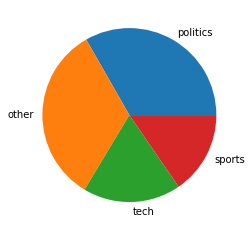

In [96]:
plt.pie(df['category'].value_counts(),labels=df['category'].value_counts().keys())

# prepare data

In [98]:
import nltk

C:\Users\newgh\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
C:\Users\newgh\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.o

In [97]:
corpus = list(df.text.values)

In [114]:
vocab=[]
for doc in corpus:
    words = nltk.word_tokenize(doc)
    vocab.extend([w.lower() for w in words if len(w)>3])
vocab = list(set(vocab))
len(vocab)

22342

In [115]:
vocab.append("PADword")

In [116]:
largest_sen = max([len(nltk.word_tokenize(doc)) for doc in corpus])

In [117]:
largest_sen

68

In [118]:
categories = df['category'].unique()

In [126]:
max_len = 50
word2idx = {w: i for i, w in enumerate(vocab)}
tag2idx = {t: i for i, t in enumerate(categories)}

In [127]:
tag2idx

{'politics': 0, 'sports': 1, 'tech': 2, 'other': 3}

In [128]:
corpus[0]

'A Right Wing Group in Texas Is Making up Fake Black Lives Matter Campaigns'

In [130]:
word2idx["right"]

10686

In [133]:
from sklearn.utils import shuffle
df = shuffle(df)

In [135]:
df.head()

,text,category
63774,aresses and\nmy father’s smile of benevolent p...,other
12247,Comment,politics
78465,"the oriental languages, and thus he should op...",other
20374,Comment,politics
38852,2nd game back Klay getting to the hoop on N...,sports


In [134]:
corpus = list(df.text.values)

In [138]:
len(corpus)

84375

In [137]:
sentences = []
for doc in corpus:
    words = nltk.word_tokenize(doc)
    sentence = [w.lower() for w in words if w.lower() in vocab]
    sentences.append(sentence)
print(len(sentences))

84375


In [139]:
print(corpus[0],sentences[0])

aresses and
my father’s smile of benevolent pleasure while regarding me are my
first recollections.  ['aresses', 'father', 'smile', 'benevolent', 'pleasure', 'while', 'regarding', 'first', 'recollections']


In [143]:
n_words = len(vocab)

In [146]:
from keras.preprocessing.sequence import pad_sequences
X = [[word2idx[w]for w in s] for s in sentences]
X = pad_sequences(maxlen=30, sequences=X, padding="post", value=n_words - 1)

In [147]:
X[0]

array([ 3432,  9878,  4960, 11104, 19038,  5625,  9808, 19281, 12629,
       22342, 22342, 22342, 22342, 22342, 22342, 22342, 22342, 22342,
       22342, 22342, 22342, 22342, 22342, 22342, 22342, 22342, 22342,
       22342, 22342, 22342])

In [148]:
y = [tag2idx[c] for c in df['category'].values]

In [153]:
tag2idx["sports"]

1

In [149]:
y[:5]

[3, 0, 3, 0, 1]

In [151]:
from tensorflow.keras.utils import to_categorical
y = [to_categorical(i, num_classes=4) for i in y]

In [152]:
y[:5]

[array([0., 0., 0., 1.], dtype=float32),
 array([1., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 1.], dtype=float32),
 array([1., 0., 0., 0.], dtype=float32),
 array([0., 1., 0., 0.], dtype=float32)]

In [169]:
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.1, random_state=2018)

# Model

In [155]:
import tensorflow as tf

In [166]:
import numpy as np

In [171]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=n_words, output_dim=50, input_length=30),
    tf.keras.layers.LSTM(units=100, return_sequences=False, recurrent_dropout=0),
    tf.keras.layers.Dense(4, activation="softmax")
])

In [172]:
y = np.array(y)

In [173]:
y.shape

(84375, 4)

In [178]:
from keras.callbacks import ModelCheckpoint

In [179]:
filepath = "model_weights_saved.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
desired_callbacks = [checkpoint]

In [181]:
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=tf.keras.metrics.Accuracy())

In [ ]:
history = model.fit(X_tr, y_tr, batch_size=32, epochs=25, verbose=1,callbacks=desired_callbacks)

Epoch 1/25
2374/2374 [==============================] - ETA: 0s - loss: 6.3117e-05 - accuracy: 0.2495
Epoch 00001: loss improved from inf to 0.00006, saving model to model_weights_saved.hdf5
2374/2374 [==============================] - 52s 20ms/step - loss: 6.3117e-05 - accuracy: 0.2495
Epoch 2/25
2374/2374 [==============================] - ETA: 0s - loss: 1.1302e-09 - accuracy: 0.2500
Epoch 00002: loss improved from 0.00006 to 0.00000, saving model to model_weights_saved.hdf5
2374/2374 [==============================] - 51s 21ms/step - loss: 1.1302e-09 - accuracy: 0.2500
Epoch 3/25
2372/2374 [============================>.] - ETA: 0s - loss: 3.6593e-10 - accuracy: 0.2499 ETA: 0s - loss: 3.7046e-1
Epoch 00003: loss improved from 0.00000 to 0.00000, saving model to model_weights_saved.hdf5
2374/2374 [==============================] - 43s 18ms/step - loss: 3.6577e-10 - accuracy: 0.2499
Epoch 4/25
2371/2374 [============================>.] - ETA: 0s - loss: 1.8854e-11 - accuracy: 0.2500


In [185]:
import pickle

In [186]:
file = open("myDict.pkl", "wb")
pickle.dump(word2idx, file)
file.close()

In [189]:
tag2idx

{'politics': 0, 'sports': 1, 'tech': 2, 'other': 3}

In [191]:
pred = model.predict(X_te)

In [193]:
pred[0]

array([1.8888820e-10, 1.2794912e-10, 1.0000000e+00, 3.7556000e-11],
      dtype=float32)

In [194]:
y_te[0]

array([0., 0., 1., 0.], dtype=float32)

In [199]:
pred[0].argmax()

2